<a href="https://colab.research.google.com/github/CallMeIsEthan/TriTueNhanTao/blob/main/BaoCao_THTTNT_ToMauDoThi_Buoi04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center"><font color="Blue">BÁO CÁO THỰC HÀNH MÔN TRÍ TUỆ NHÂN TẠO</font></h1>**

TUẦN 4 - CÁC PHƯƠNG PHÁP GIẢI BÀI TOÁN THỎA MÃN RÀNG BUỘC

Họ và tên: Phan Tuấn Giang

MSSV: 2001230198

<h1>BÀI TOÁN TÔ MÀU ĐỒ THỊ</h1>

## 1. Phát biểu bài toán
### 1.1 Định nghĩa
Bài toán tô màu đồ thị là một trong những bài toán cơ bản và quan trọng của lý thuyết đồ thị. Mục tiêu của bài toán là gán một màu cho mỗi đỉnh của đồ thị sao cho không có hai đỉnh kề nhau được tô cùng một màu. Hai đỉnh được xem là kề nhau nếu giữa chúng tồn tại một cạnh nối trực tiếp.
Về mặt hình thức, với một đồ thị vô hướng G = (V, E), bài toán yêu cầu cần tìm một hàm ánh xạ:
$$
c : V \rightarrow \{1, 2, \ldots, k\}
$$
Sao cho với mọi cạnh $ (u, v) \in E $, ta có:
$$
c(u) \neq c(v)
$$
### 1.2. Mục tiêu tối ưu
Mục tiêu là sử dụng **số lượng màu ít nhất có thể**. Số lượng màu tối thiểu cần thiết để tô màu cho đồ thị $G$ được gọi là **Sắc số (Chromatic Number)**, ký hiệu là $\chi(G)$. <br>

> Sắc số là số lượng màu tối thiểu cần thiết để tô màu cho các đỉnh của một đồ thị sao cho không có hai đỉnh kề nhau cùng màu. Đối với nhiều bài toán trong lý thuyết đồ thị, việc xác định sắc số là rất quan trọng khi cần lập kế hoạch, phân bổ tài nguyên hoặc tổ chức không gian một cách hợp lý.

## 2. Ứng dụng thực tế
Lập lịch thi: giúp sắp xếp các môn có sinh viên trùng nhau vào các thời điểm khác nhau.

**1. Tô màu bản đồ:** đảm bảo các vùng lãnh thổ kề nhau không dùng cùng màu.
Mạng không dây: gán các kênh tần số khác nhau cho các thiết bị gần nhau để tránh nhiễu.

**2. Biên dịch chương trình:** phân bổ thanh ghi bằng cách đảm bảo các biến có phạm vi sống chồng nhau không dùng chung thanh ghi.

**3. Lập lịch sản xuất:** xếp các công việc tranh chấp tài nguyên vào các thời điểm khác nhau.

**4. Đèn giao thông:** phân pha tín hiệu cho các luồng giao thông giao nhau sao cho không xung đột.

**5. Phân phối dữ liệu:** gán tài nguyên truyền dẫn sao cho các luồng dữ liệu xung đột không sử dụng chung kênh.

## 3. Ý tưởng và chiến lược giải quyết

### 3.1. Tại sao chọn đỉnh bậc cao nhất? (Heuristic)
* **Bậc của đỉnh (Degree):** Là số lượng cạnh nối với đỉnh đó.
* **Nhận định:** Đỉnh có bậc càng cao nghĩa là nó kết nối với càng nhiều đỉnh khác. Do đó, nó chịu nhiều ràng buộc nhất và cũng gây ra nhiều ràng buộc nhất cho các đỉnh xung quanh.
* **Chiến lược:** "Làm việc khó trước". Nếu ta tô màu các đỉnh bậc cao trước, ta sẽ giải quyết được các điểm "nóng" của đồ thị. Nếu để các đỉnh này lại sau cùng, khả năng cao là các đỉnh xung quanh đã dùng hết các màu, buộc ta phải thêm màu mới (tăng số lượng màu không cần thiết).

### 3.2. Tại sao phải "Hạ bậc"?
* Khi một đỉnh đã được tô màu, nó xem như "biến mất" khỏi bài toán cần giải quyết tiếp theo.
* Bậc của các đỉnh hàng xóm thực chất là "số lượng đỉnh kề *chưa được tô màu*".
* Việc cập nhật này đảm bảo tại mỗi bước, ta luôn chọn đỉnh khó nhất **trong bối cảnh hiện tại**, giúp thuật toán linh hoạt và chính xác hơn.

## 4. Thuật toán chi tiết (Pseudocode)

### Đầu vào:
* Ma trận kề $G$ kích thước $N \times N$.
* Danh sách màu $Colors$.

### Các bước thực hiện:

1.  **Khởi tạo:**
    * Tính bậc ban đầu cho tất cả các đỉnh: $Degree[v]$.
    * Tạo danh sách đánh dấu $Colored[v] = False$.
    * Biến đếm $Count = 0$.

2.  **Vòng lặp chính (While $Count < N$):**

    * **Bước 1: Lựa chọn (Select)**
        * Trong số các đỉnh *chưa tô màu* ($Colored[v] == False$), tìm đỉnh $u$ có $Degree[u]$ lớn nhất.
    
    * **Bước 2: Gán màu (Assign)**
        * Xét các đỉnh kề với $u$ đã được tô màu, lập danh sách "Màu cấm".
        * Chọn màu đầu tiên trong danh sách $Colors$ không thuộc "Màu cấm".
        * Gán màu cho $u$, đánh dấu $Colored[u] = True$.
        * Tăng $Count$.

    * **Bước 3: Hạ bậc (Update/Reduce Degree)**
        * Đặt $Degree[u] = 0$ (hoặc -1) để loại khỏi các lần xét sau.
        * Duyệt qua tất cả các đỉnh $v$ là hàng xóm của $u$. Nếu $v$ chưa tô màu:
            $$Degree[v] = Degree[v] - 1$$

### Đầu ra:
* Danh sách các cặp (Đỉnh, Màu) đã gán.

###Pseudocode chi tiết

```
BẮT ĐẦU

    // ============ 1. KHỞI TẠO ============
    VỚI MỖI đỉnh i TỪ 0 ĐẾN N-1:
        Degree[i] ← Tổng các phần tử hàng i trong ma trận G  // Tính bậc ban đầu
        IsColored[i] ← False                                  // Đánh dấu chưa tô màu
        Colors[i] ← Null                                      // Chưa có màu
    
    Count ← 0  // Đếm số đỉnh đã tô

    // ============ 2. VÒNG LẶP CHÍNH ============
    TRONG KHI Count < N:

        // --- BƯỚC 2.1: CHỌN ĐỈNH có bậc cao nhất ---
        Max_Deg ← -1
        u ← -1  // u là đỉnh được chọn
        
        VỚI MỖI đỉnh i TỪ 0 ĐẾN N-1:
            NẾU (IsColored[i] == False) VÀ (Degree[i] > Max_Deg):
                Max_Deg ← Degree[i]
                u ← i
        
        NẾU u == -1:  // Không tìm được đỉnh nào
            DỪNG VÒNG LẶP

        // --- BƯỚC 2.2: TÔ MÀU ---
        Forbidden_Colors ← {}  // Tập màu cấm (rỗng)
        
        // Tìm các màu đã bị hàng xóm sử dụng
        VỚI MỖI đỉnh v TỪ 0 ĐẾN N-1:
            NẾU (G[u][v] == 1) VÀ (IsColored[v] == True):
                THÊM Colors[v] VÀO Forbidden_Colors
        
        // Chọn màu hợp lệ đầu tiên
        Selected_Color ← Màu đầu tiên trong Palette KHÔNG thuộc Forbidden_Colors
        
        Colors[u] ← Selected_Color
        IsColored[u] ← True
        Count ← Count + 1

        // --- BƯỚC 2.3: HẠ BẬC ---
        Degree[u] ← -1  // Loại đỉnh vừa tô khỏi tính toán
        
        // Giảm bậc của các đỉnh kề chưa tô
        VỚI MỖI đỉnh v TỪ 0 ĐẾN N-1:
            NẾU (G[u][v] == 1) VÀ (IsColored[v] == False):
                Degree[v] ← Degree[v] - 1

    HẾT VÒNG LẶP

    TRẢ VỀ Colors

KẾT THÚC
```


---

# 5. CÀI ĐẶT VÀ CHẠY CHƯƠNG TRÌNH

---

## PHẦN A: TÔ MÀU ĐỒ THỊ ĐỌC TỪ FILE TEXT

---

###Bước 1: Import các thư viện cần thiết

Trước tiên, chúng ta cần import các thư viện cần thiết cho chương trình:
- **networkx**: Thư viện xử lý và vẽ đồ thị
- **matplotlib**: Thư viện vẽ hình và biểu đồ


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

print("Đã import thành công các thư viện cần thiết!")

Đã import thành công các thư viện cần thiết!


###Bước 2: Tạo file dữ liệu đầu vào (Ma trận kề)

Chúng ta sử dụng lệnh magic `%%writefile` để tạo file `input_graph.txt` chứa ma trận kề của đồ thị.

In [2]:
%%writefile input_graph.txt
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0

Writing input_graph.txt


###Bước 3: Định nghĩa hàm đọc file ma trận kề

Hàm `loadGraph()` có nhiệm vụ:
1. Mở file text chứa ma trận kề
2. Đọc từng dòng và chuyển đổi thành danh sách số nguyên
3. Trả về ma trận dưới dạng list of lists

In [3]:
def loadGraph(filename):
    """
    Đọc file cấu trúc đồ thị và trả về ma trận kề dưới dạng array(list).

    Tham số nhận vào (Parameters):
    -----------------------------
    filename : str
        Tên file .txt chứa ma trận kề (các số cách nhau bởi khoảng trắng).

    Đầu ra (Returns):
    ----------------
    list
        Một danh sách lồng (list of lists) biểu diễn ma trận kề.
        Ví dụ: [[0,1,1], [1,0,1], [1,1,0]] cho đồ thị 3 đỉnh
    """

    # Khởi tạo danh sách rỗng để lưu ma trận
    matrix = []

    try:
        # Mở file với chế độ đọc ('r' = read)
        # Sử dụng 'with' để tự động đóng file sau khi xử lý xong
        with open(filename, 'r') as f:

            # Duyệt qua từng dòng trong file
            for line in f:
                # line.strip(): Loại bỏ khoảng trắng và ký tự xuống dòng ở đầu/cuối
                # line.split(): Tách chuỗi thành list theo khoảng trắng
                # int(x): Chuyển mỗi phần tử từ string sang integer
                # [int(x) for x in ...]: List comprehension để tạo list số nguyên
                row = [int(x) for x in line.strip().split()]

                # Thêm dòng vào ma trận
                matrix.append(row)

        return matrix

    except FileNotFoundError:
        # Xử lý trường hợp không tìm thấy file
        print(f"Lỗi: Không tìm thấy file {filename}")
        return []

### Bước 4: Định nghĩa lớp GraphColoring

Lớp `GraphColoring` là lớp chính xử lý bài toán tô màu đồ thị, bao gồm:

**Thuộc tính (Attributes):**
- `G_matrix`: Ma trận kề của đồ thị
- `num_vertices`: Số lượng đỉnh
- `node_names`: Tên các đỉnh (A, B, C, ...)
- `colors_solution`: Dictionary lưu kết quả tô màu
- `palette`: Bảng màu sử dụng
- `G_nx`: Đồ thị NetworkX để vẽ
- `pos`: Vị trí cố định của các đỉnh khi vẽ

**Phương thức (Methods):**
- `__init__()`: Khởi tạo đối tượng
- `visualize_step()`: Vẽ trạng thái hiện tại của đồ thị
- `solve()`: Thực hiện thuật toán tô màu
- `visualize()`: Vẽ kết quả cuối cùng

In [4]:
class GraphColoring:
    """
    Lớp xử lý bài toán tô màu đồ thị.
    Sử dụng thuật toán Greedy với chiến lược chọn đỉnh bậc cao nhất trước.
    """

    def __init__(self, adjacency_matrix):
        """
        Phương thức khởi tạo (Constructor)

        Tham số:
        --------
        adjacency_matrix : list of lists
            Ma trận kề của đồ thị (2D array)
        """
        # ===== LƯU TRỮ DỮ LIỆU ĐẦU VÀO =====
        # Lưu ma trận kề vào thuộc tính của đối tượng
        self.G_matrix = adjacency_matrix

        # Tính số lượng đỉnh (số hàng của ma trận)
        self.num_vertices = len(adjacency_matrix)

        # ===== TẠO TÊN CHO CÁC ĐỈNH =====
        # chr(65) = 'A', chr(66) = 'B', ...
        # Tạo danh sách tên: ['A', 'B', 'C', 'D', 'E', 'F']
        self.node_names = [chr(65 + i) for i in range(self.num_vertices)]

        # ===== KHỞI TẠO KẾT QUẢ =====
        # Dictionary rỗng để lưu kết quả: {'A': 'Red', 'B': 'Green', ...}
        self.colors_solution = {}

        # ===== BẢNG MÀU (PALETTE) =====
        # Danh sách các màu có thể sử dụng để tô đồ thị
        self.palette = [
            'Red',      # Đỏ
            'Green',    # Xanh lá
            'Blue',     # Xanh dương
            'Yellow',   # Vàng
            'Orange',   # Cam
            'Purple',   # Tím
            'Cyan',     # Xanh ngọc
            'Gray'      # Xám
        ]

        # ===== TẠO ĐỒ THỊ NETWORKX ĐỂ VẼ =====
        # Khởi tạo đồ thị vô hướng (Graph)
        self.G_nx = nx.Graph()

        # Thêm các đỉnh và cạnh vào đồ thị NetworkX
        for i in range(self.num_vertices):
            node_name = self.node_names[i]  # Lấy tên đỉnh (A, B, C, ...)
            self.G_nx.add_node(node_name)   # Thêm đỉnh vào đồ thị

            # Chỉ duyệt j > i để tránh thêm cạnh trùng lặp (vì đồ thị vô hướng)
            for j in range(i + 1, self.num_vertices):
                # Nếu có cạnh nối giữa đỉnh i và j (giá trị = 1 trong ma trận)
                if self.G_matrix[i][j] == 1:
                    # Thêm cạnh nối giữa 2 đỉnh
                    self.G_nx.add_edge(node_name, self.node_names[j])

        # ===== CỐ ĐỊNH VỊ TRÍ CÁC ĐỈNH =====
        # spring_layout: Thuật toán sắp xếp vị trí đỉnh theo mô hình lò xo
        # seed=42: Cố định kết quả để hình vẽ không thay đổi mỗi lần chạy
        self.pos = nx.spring_layout(self.G_nx, seed=42)

    def visualize_step(self, step_number, current_node_idx=None):
        """
        Hàm vẽ trạng thái hiện tại của đồ thị.

        Tham số:
        --------
        step_number : int hoặc str
            Số thứ tự bước hiện tại (hoặc "HOÀN THÀNH")
        current_node_idx : int, optional
            Index của đỉnh đang được xử lý (để làm nổi bật)
        """
        # Tạo figure mới với kích thước 6x4 inch
        plt.figure(figsize=(6, 4))

        # ===== TẠO DANH SÁCH MÀU CHO TẤT CẢ CÁC ĐỈNH =====
        node_colors = []
        for name in self.G_nx.nodes():
            if name in self.colors_solution:
                # Đỉnh đã được tô màu -> lấy màu đã gán
                node_colors.append(self.colors_solution[name])
            else:
                # Đỉnh chưa được tô -> dùng màu xám nhạt
                node_colors.append('lightgray')

        # ===== VẼ ĐỒ THỊ =====
        nx.draw(
            self.G_nx,              # Đồ thị cần vẽ
            self.pos,               # Vị trí các đỉnh
            node_color=node_colors, # Màu các đỉnh
            with_labels=True,       # Hiển thị tên đỉnh
            node_size=1500,         # Kích thước đỉnh
            font_weight='bold',     # Font chữ đậm
            font_color='black',     # Màu chữ đen
            edge_color='gray'       # Màu các cạnh
        )

        # ===== TẠO TIÊU ĐỀ =====
        title = f"Bước {step_number}"

        # Nếu có đỉnh đang xử lý, làm nổi bật nó
        if current_node_idx is not None:
            node_name = self.node_names[current_node_idx]
            title += f": Đang chọn đỉnh {node_name} (Bậc cao nhất)"

            # Vẽ viền đen đậm quanh đỉnh đang chọn
            nx.draw_networkx_nodes(
                self.G_nx, self.pos,
                nodelist=[node_name],           # Chỉ vẽ đỉnh đang chọn
                node_size=1500,
                edgecolors='black',             # Viền đen
                linewidths=2,                   # Độ dày viền
                node_color=self.colors_solution.get(node_name, 'lightgray')
            )

        plt.title(title)
        plt.show()

    def solve(self):
        """
        Thực hiện thuật toán tô màu đồ thị.

        Trả về:
        -------
        dict
            Dictionary chứa kết quả tô màu: {'A': 'Red', 'B': 'Green', ...}
        """
        # ===== BƯỚC 1: KHỞI TẠO =====

        # Tính bậc ban đầu cho tất cả các đỉnh
        # sum(self.G_matrix[i]) = tổng các phần tử hàng i = số cạnh nối với đỉnh i
        current_degrees = []
        for i in range(self.num_vertices):
            current_degrees.append(sum(self.G_matrix[i]))

        # Danh sách đánh dấu đỉnh đã tô màu chưa (False = chưa tô)
        colored_status = [False] * self.num_vertices

        # Biến đếm số đỉnh đã tô
        count_colored = 0

        print(f"--- BẮT ĐẦU ---")
        print("Trạng thái ban đầu:")

        # Vẽ trạng thái ban đầu (tất cả đỉnh đều xám)
        self.visualize_step(0)

        # ===== BƯỚC 2: VÒNG LẶP CHÍNH =====
        # Lặp cho đến khi tô hết tất cả các đỉnh
        while count_colored < self.num_vertices:

            # --- BƯỚC 2.1: CHỌN ĐỈNH BẬC CAO NHẤT ---
            max_degree = -1  # Bậc lớn nhất tìm được
            u = -1           # Index của đỉnh được chọn

            # Duyệt qua tất cả các đỉnh
            for i in range(self.num_vertices):
                # Chỉ xét các đỉnh CHƯA được tô màu
                if not colored_status[i]:
                    # Nếu bậc của đỉnh i lớn hơn max hiện tại
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i  # Cập nhật đỉnh được chọn

            # Kiểm tra điều kiện dừng (thoát nếu không còn đỉnh nào)
            if u == -1:
                break

            # --- BƯỚC 2.2: TÔ MÀU ---

            # Tìm các màu cấm (màu đã được hàng xóm sử dụng)
            forbidden_colors = set()  # Dùng set để tránh trùng lặp

            for v in range(self.num_vertices):
                # Kiểm tra: v là hàng xóm của u VÀ v đã được tô màu
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    # Lấy màu của hàng xóm và thêm vào danh sách cấm
                    neighbor_color = self.colors_solution[self.node_names[v]]
                    forbidden_colors.add(neighbor_color)

            # Chọn màu đầu tiên trong palette KHÔNG nằm trong danh sách cấm
            color_idx = 0
            while self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            # Gán màu cho đỉnh u
            assigned_color = self.palette[color_idx]
            self.colors_solution[self.node_names[u]] = assigned_color

            # Đánh dấu đỉnh u đã được tô
            colored_status[u] = True
            count_colored += 1

            # Vẽ hình sau khi tô màu
            print(f"-> Đã tô đỉnh {self.node_names[u]} màu {assigned_color}")
            self.visualize_step(count_colored, u)

            # --- BƯỚC 2.3: HẠ BẬC ---

            # Đặt bậc của đỉnh đã tô = 0 (loại khỏi các lần xét sau)
            current_degrees[u] = 0

            # Giảm bậc của các đỉnh kề CHƯA được tô
            for v in range(self.num_vertices):
                # v là hàng xóm của u VÀ v chưa được tô màu
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1

        return self.colors_solution

    def visualize(self):
        """
        Vẽ kết quả cuối cùng của bài toán.
        """
        self.visualize_step("HOÀN THÀNH")

### Bước 5: Chạy chương trình chính

Bây giờ chúng ta sẽ chạy chương trình để:
1. Đọc ma trận kề từ file `input_graph.txt`
2. Hiển thị ma trận đọc được
3. Tạo đối tượng GraphColoring và giải bài toán
4. In kết quả và hiển thị đồ thị đã tô màu

Dang doc du lieu tu file: input_graph.txt
----------------------------------------
Ma trận kề (Adjacency Matrix):

       A   B   C   D   E   F 
  A  0  1  1  0  1  0
  B  1  0  1  1  0  1
  C  1  1  0  1  1  0
  D  0  1  1  0  0  1
  E  1  0  1  0  0  1
  F  0  1  0  1  1  0
----------------------------------------
Dang thuc hien thuat toan to mau...
----------------------------------------
--- BẮT ĐẦU ---
Trạng thái ban đầu:


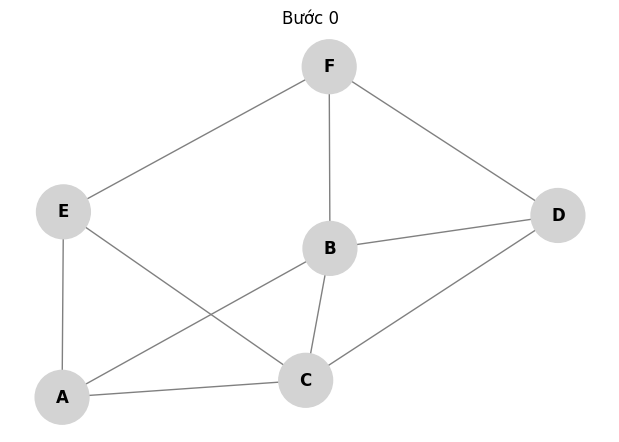

-> Đã tô đỉnh B màu Red


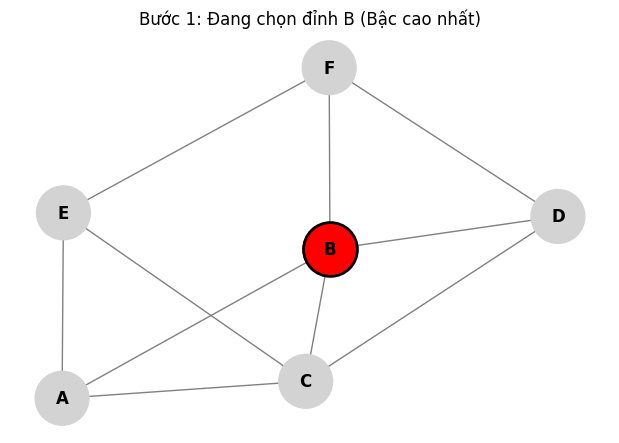

-> Đã tô đỉnh C màu Green


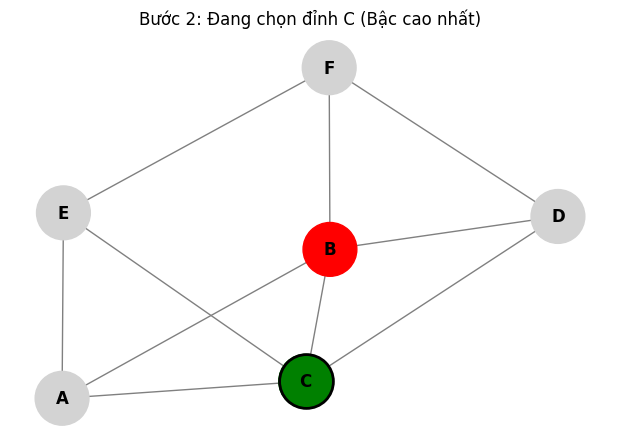

-> Đã tô đỉnh E màu Red


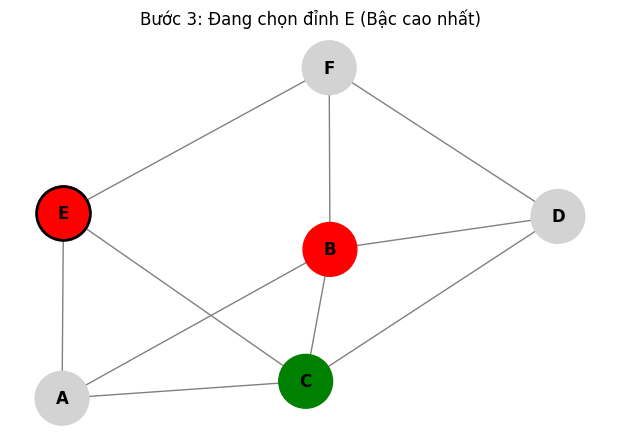

-> Đã tô đỉnh D màu Blue


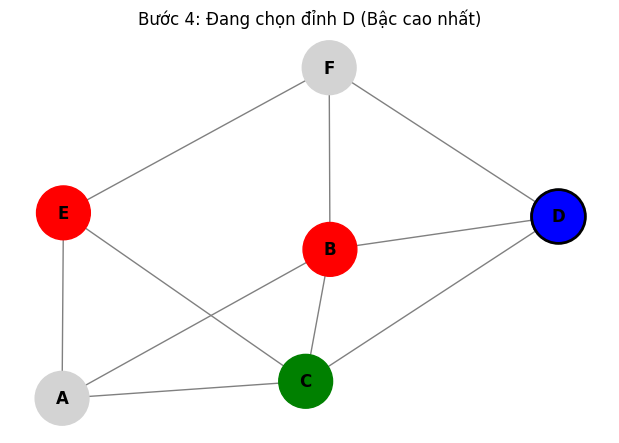

-> Đã tô đỉnh A màu Blue


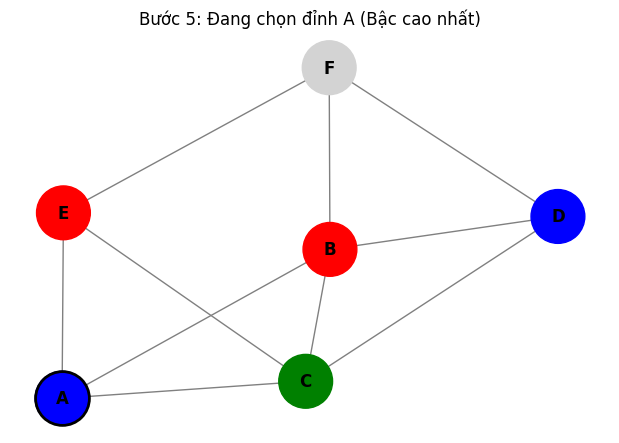

-> Đã tô đỉnh F màu Green


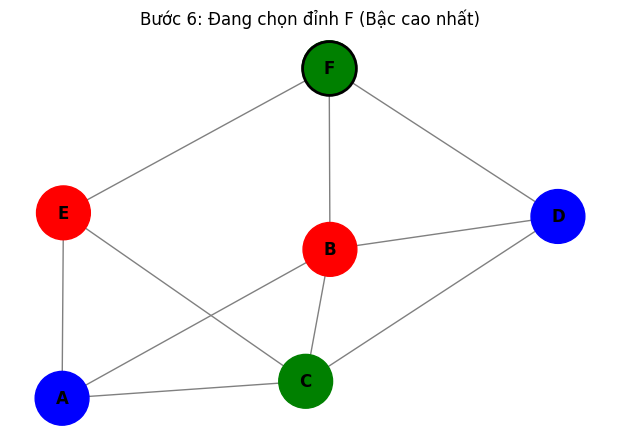

----------------------------------------
KET QUA TO MAU:
----------------------------------------
  Đỉnh A: Blue
  Đỉnh B: Red
  Đỉnh C: Green
  Đỉnh D: Blue
  Đỉnh E: Red
  Đỉnh F: Green
----------------------------------------
Tong so mau su dung: 3
----------------------------------------
Do thi da to mau hoan chinh:


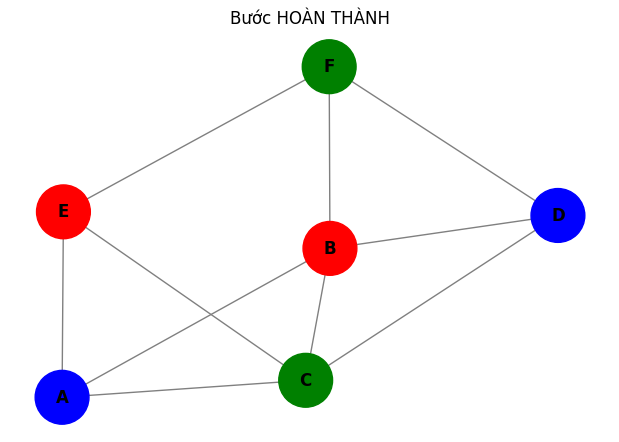

In [5]:
# --- BƯỚC 1: Đặt tên file đầu vào ---
# Đường dẫn đến file chứa ma trận kề
# Lưu ý: Trên Google Colab, file sẽ được lưu tại /content/
input_filename = 'input_graph.txt'  # Thay đổi đường dẫn nếu cần

# --- BƯỚC 2: Đọc dữ liệu từ file ---
print(f"Dang doc du lieu tu file: {input_filename}")
print("-" * 40)

# Gọi hàm loadGraph để đọc ma trận kề từ file
adj_list = loadGraph(input_filename)

# --- BƯỚC 3: Kiểm tra và hiển thị ma trận ---
if len(adj_list) > 0:
    # In ma trận kề đã đọc được
    print("Ma trận kề (Adjacency Matrix):")
    print()

    # In header (tên các đỉnh)
    header = "     "  # Khoảng trắng đầu
    for i in range(len(adj_list)):
        header += f"  {chr(65+i)} "  # A, B, C, ...
    print(header)

    # In từng hàng của ma trận
    for idx, row in enumerate(adj_list):
        row_str = f"  {chr(65+idx)}  "  # Tên đỉnh ở đầu hàng
        row_str += "  ".join(map(str, row))
        print(row_str)

    print("-" * 40)

    # --- BƯỚC 4: Khởi tạo đối tượng GraphColoring ---
    # Tạo instance của lớp GraphColoring với ma trận kề đã đọc
    graph_app = GraphColoring(adj_list)

    # --- BƯỚC 5: Giải bài toán ---
    print("Dang thuc hien thuat toan to mau...")
    print("-" * 40)

    # Gọi phương thức solve() để chạy thuật toán
    result = graph_app.solve()

    # --- BƯỚC 6: In kết quả ---
    print("-" * 40)
    print("KET QUA TO MAU:")
    print("-" * 40)

    # Sắp xếp và in kết quả theo tên đỉnh
    for node in sorted(result.keys()):
        print(f"  Đỉnh {node}: {result[node]}")

    # Tính số màu đã sử dụng
    num_colors = len(set(result.values()))
    print("-" * 40)
    print(f"Tong so mau su dung: {num_colors}")

    # --- BƯỚC 7: Hiển thị đồ thị hoàn thành ---
    print("-" * 40)
    print("Do thi da to mau hoan chinh:")
    graph_app.visualize()

else:
    # Xử lý trường hợp không đọc được file
    print("Khong the chay chuong trinh do loi doc file.")

---

## PHẦN B: TÔ MÀU ĐỒ THỊ SINH NGẪU NHIÊN

---

Trong phần này, chúng ta sẽ:
1. Sinh ngẫu nhiên một ma trận kề cho đồ thị với số đỉnh do người dùng nhập
2. Lưu ma trận vào file và đọc lại
3. Thực hiện thuật toán tô màu với bảng theo dõi quá trình (Trace Table)

### Bước 1: Import thêm các thư viện cần thiết

In [6]:
import random
import os
import pandas as pd
from IPython.display import display

print("Import thư viện thành công!")

Import thư viện thành công!


### Bước 2: Định nghĩa hàm sinh ma trận ngẫu nhiên

Hàm `generate_random_graph_file()` sẽ:
1. Tạo ma trận kề ngẫu nhiên cho đồ thị vô hướng
2. Đảm bảo tính đối xứng (vì đồ thị vô hướng)
3. Lưu ma trận vào file text

In [7]:
def generate_random_graph_file(num_vertices, filename='random_graph.txt'):
    """
    Sinh ma trận kề ngẫu nhiên cho đồ thị vô hướng và lưu vào file.

    Tham số (Parameters):
    --------------------
    num_vertices : int
        Số lượng đỉnh mong muốn trong đồ thị
    filename : str, optional
        Tên file để lưu ma trận (mặc định: 'random_graph.txt')

    Ghi chú:
    -------
    - Ma trận sinh ra sẽ đối xứng qua đường chéo chính
    - Xác suất xuất hiện cạnh giữa 2 đỉnh là 50%
    - Đường chéo chính luôn bằng 0 (không có cạnh khuyên)
    """

    # ===== KHỞI TẠO MA TRẬN TOÀN SỐ 0 =====
    # Tạo ma trận N x N với tất cả phần tử = 0
    # Sử dụng list comprehension lồng nhau
    matrix = [[0] * num_vertices for _ in range(num_vertices)]
    # Giải thích:
    #   - [0] * num_vertices: Tạo một hàng gồm num_vertices số 0
    #   - for _ in range(...): Lặp num_vertices lần để tạo num_vertices hàng
    #   - _ : Biến không sử dụng (chỉ cần đếm số lần lặp)

    # ===== SINH CÁC CẠNH NGẪU NHIÊN =====
    # Duyệt qua từng cặp đỉnh để gán cạnh ngẫu nhiên
    # Chỉ duyệt tam giác trên (i < j) để đảm bảo tính đối xứng
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            # random.choice([0, 1]): Chọn ngẫu nhiên 0 hoặc 1
            # 0 = không có cạnh, 1 = có cạnh
            # Xác suất 50-50
            edge_exists = random.choice([0, 1])

            # Gán giá trị cho cả 2 vị trí đối xứng
            matrix[i][j] = edge_exists  # Tam giác trên
            matrix[j][i] = edge_exists  # Tam giác dưới (đối xứng)

    # ===== GHI MA TRẬN VÀO FILE =====
    # Mở file với chế độ ghi ('w' = write)
    with open(filename, 'w') as f:
        for row in matrix:
            # Chuyển list số thành chuỗi: [0, 1, 0] -> "0 1 0"
            # map(str, row): Chuyển mỗi số thành string
            # " ".join(...): Nối các string bằng khoảng trắng
            line = " ".join(map(str, row))

            # Ghi dòng vào file (thêm ký tự xuống dòng)
            f.write(line + "\n")

    print(f"Da sinh ngau nhien do thi {num_vertices} dinh")
    print(f"   Luu vao file: '{filename}'")

### Bước 3: Định nghĩa lớp GraphColoring phiên bản nâng cao

Phiên bản này bổ sung thêm:
- **Trace Table**: Bảng theo dõi quá trình thuật toán từng bước
- **Hỗ trợ nhiều đỉnh hơn**: Đặt tên V0, V1, V2... nếu có hơn 26 đỉnh
- **Nhiều màu hơn**: Bảng màu mở rộng với 12 màu

In [8]:
class GraphColoringAdvanced:
    """
    Lớp xử lý tô màu đồ thị - Phiên bản nâng cao.

    Tính năng mới:
    - Tạo bảng theo dõi quá trình (Trace Table)
    - Hỗ trợ đồ thị có nhiều hơn 26 đỉnh
    - Bảng màu mở rộng
    """

    def __init__(self, adjacency_matrix):
        """
        Phương thức khởi tạo

        Tham số:
        --------
        adjacency_matrix : list of lists
            Ma trận kề của đồ thị
        """
        # Lưu ma trận kề
        self.G_matrix = adjacency_matrix
        self.num_vertices = len(adjacency_matrix)

        # ===== TẠO TÊN CHO CÁC ĐỈNH =====
        # Nếu <= 26 đỉnh: dùng A, B, C, ...
        # Nếu > 26 đỉnh: dùng V0, V1, V2, ...
        if self.num_vertices <= 26:
            self.node_names = [chr(65 + i) for i in range(self.num_vertices)]
        else:
            self.node_names = [f"V{i}" for i in range(self.num_vertices)]

        # Dictionary lưu kết quả tô màu
        self.colors_solution = {}

        # ===== BẢNG MÀU MỞ RỘNG =====
        # 12 màu để hỗ trợ đồ thị phức tạp hơn
        self.palette = [
            'Red',      # Đỏ
            'Green',    # Xanh lá
            'Blue',     # Xanh dương
            'Yellow',   # Vàng
            'Orange',   # Cam
            'Purple',   # Tím
            'Cyan',     # Xanh ngọc
            'Pink',     # Hồng
            'Brown',    # Nâu
            'Gray',     # Xám
            'Olive',    # Xanh olive
            'Teal'      # Xanh mòng két
        ]

        # ===== TẠO ĐỒ THỊ NETWORKX =====
        self.G_nx = nx.Graph()
        for i in range(self.num_vertices):
            node_name = self.node_names[i]
            self.G_nx.add_node(node_name)
            for j in range(i + 1, self.num_vertices):
                if self.G_matrix[i][j] == 1:
                    self.G_nx.add_edge(node_name, self.node_names[j])

        # Cố định vị trí đỉnh với tham số tùy chỉnh
        # k=0.8: Khoảng cách giữa các đỉnh (lớn hơn = xa hơn)
        self.pos = nx.spring_layout(self.G_nx, seed=100, k=0.8)

    def visualize_step(self, step_count, current_node_idx=None):
        """
        Vẽ đồ thị tại bước hiện tại

        Tham số:
        --------
        step_count : int hoặc str
            Số bước hiện tại
        current_node_idx : int, optional
            Index của đỉnh đang xử lý
        """
        # Đóng tất cả figure cũ để tránh chồng chất
        plt.close('all')
        plt.figure(figsize=(6, 5))

        # Tạo danh sách màu cho các đỉnh
        node_colors = []
        for name in self.G_nx.nodes():
            if name in self.colors_solution:
                node_colors.append(self.colors_solution[name])
            else:
                node_colors.append('whitesmoke')  # Màu trắng xám cho đỉnh chưa tô

        # Vẽ các thành phần của đồ thị riêng biệt để kiểm soát tốt hơn
        # Vẽ cạnh
        nx.draw_networkx_edges(self.G_nx, self.pos, edge_color='gray', width=1.5)

        # Vẽ đỉnh
        nx.draw_networkx_nodes(self.G_nx, self.pos,
                               node_color=node_colors,
                               node_size=800,
                               edgecolors='black')

        # Vẽ nhãn
        nx.draw_networkx_labels(self.G_nx, self.pos,
                                font_size=10,
                                font_weight='bold')

        # Tạo tiêu đề và làm nổi bật đỉnh đang chọn
        title = f"Bước {step_count}"
        if current_node_idx is not None:
            node_name = self.node_names[current_node_idx]
            title += f": Đang chọn đỉnh {node_name}"

            # Vẽ viền đỏ đậm quanh đỉnh đang chọn
            nx.draw_networkx_nodes(
                self.G_nx, self.pos,
                nodelist=[node_name],
                node_size=800,
                node_color=self.colors_solution[node_name],
                edgecolors='red',      # Viền đỏ
                linewidths=3           # Viền dày
            )

        plt.title(title)
        plt.axis('off')  # Tắt trục tọa độ
        plt.show()

    def solve(self):
        """
        Thực hiện thuật toán tô màu với Trace Table

        Trả về:
        -------
        tuple
            (dict kết quả tô màu, DataFrame bảng trace)
        """
        # ===== KHỞI TẠO =====
        # Tính bậc ban đầu (dùng list comprehension ngắn gọn hơn)
        current_degrees = [sum(self.G_matrix[i]) for i in range(self.num_vertices)]

        colored_status = [False] * self.num_vertices
        count_colored = 0

        # ===== DANH SÁCH LƯU LỊCH SỬ ĐỂ TẠO BẢNG =====
        history_data = []

        print("--- TRẠNG THÁI BAN ĐẦU ---")
        self.visualize_step(0)

        # ===== VÒNG LẶP CHÍNH =====
        while count_colored < self.num_vertices:

            # --- BƯỚC 1: Chọn đỉnh bậc lớn nhất ---
            max_degree = -999  # Dùng -999 để đảm bảo tìm được đỉnh
            u = -1

            for i in range(self.num_vertices):
                if not colored_status[i]:
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i

            if u == -1:
                break

            # --- BƯỚC 2: Tô màu ---
            # Tìm màu cấm
            forbidden_colors = set()
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    neighbor_name = self.node_names[v]
                    forbidden_colors.add(self.colors_solution[neighbor_name])

            # Chọn màu hợp lệ đầu tiên
            color_idx = 0
            while color_idx < len(self.palette) and self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            # Gán màu (dùng 'black' nếu hết màu trong palette)
            assigned_color = self.palette[color_idx] if color_idx < len(self.palette) else 'black'
            self.colors_solution[self.node_names[u]] = assigned_color
            colored_status[u] = True
            count_colored += 1

            # ===== TẠO MỘT DÒNG DỮ LIỆU CHO TRACE TABLE =====
            step_record = {
                "Bước": count_colored,
                "Đỉnh chọn": self.node_names[u],
                "Bậc khi chọn": max_degree,
                "Màu tô": assigned_color,
                "Màu cấm": ", ".join(sorted(list(forbidden_colors))) if forbidden_colors else "Không"
            }

            # Lưu trạng thái bậc của tất cả các đỉnh tại bước này
            for idx, name in enumerate(self.node_names):
                if colored_status[idx] and idx != u:
                    # Đỉnh đã tô trước đó -> đánh dấu "-"
                    step_record[f"Bậc {name}"] = "-"
                else:
                    # Ghi bậc hiện tại
                    step_record[f"Bậc {name}"] = current_degrees[idx]

            history_data.append(step_record)

            # --- BƯỚC 3: Hạ bậc ---
            current_degrees[u] = -1  # Loại khỏi tính toán

            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1

            # Vẽ hình
            print(f"-> Đã chọn đỉnh {self.node_names[u]} (Bậc {max_degree}), tô màu {assigned_color}")
            self.visualize_step(count_colored, u)

        # ===== TẠO DATAFRAME TỪ LỊCH SỬ =====
        df_report = pd.DataFrame(history_data)

        return self.colors_solution, df_report

### Bước 4: Chạy chương trình với đồ thị ngẫu nhiên

Chương trình sẽ yêu cầu nhập số lượng đỉnh, sau đó sinh ma trận ngẫu nhiên và chạy thuật toán tô màu.

   CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ NGẪU NHIÊN
Nhap so luong dinh (khuyen dung 5-10): 10

----------------------------------------
1. Dang sinh ma tran ngau nhien...
Da sinh ngau nhien do thi 10 dinh
   Luu vao file: 'random_graph.txt'

----------------------------------------
2. Dang doc lai du lieu tu file...

Ma tran ke duoc sinh:
   A: [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
   B: [1, 0, 1, 0, 0, 1, 1, 1, 0, 1]
   C: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
   D: [0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
   E: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
   F: [1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
   G: [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
   H: [1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
   I: [1, 0, 1, 0, 0, 1, 1, 1, 0, 1]
   J: [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]

----------------------------------------
3. Bat dau thuat toan to mau...
----------------------------------------
--- TRẠNG THÁI BAN ĐẦU ---


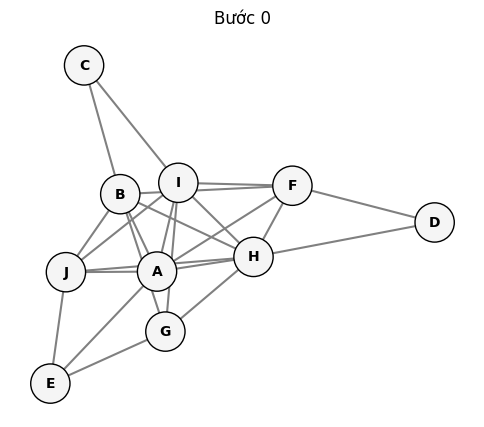

-> Đã chọn đỉnh H (Bậc 7), tô màu Red


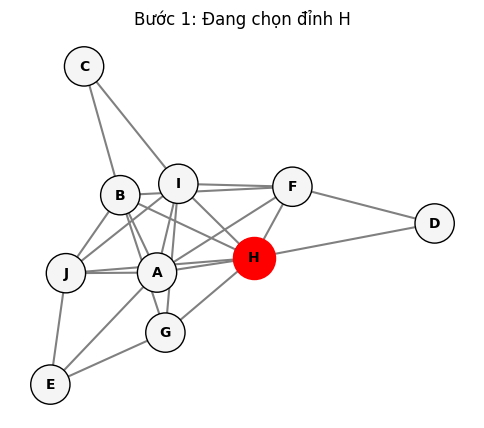

-> Đã chọn đỉnh A (Bậc 5), tô màu Green


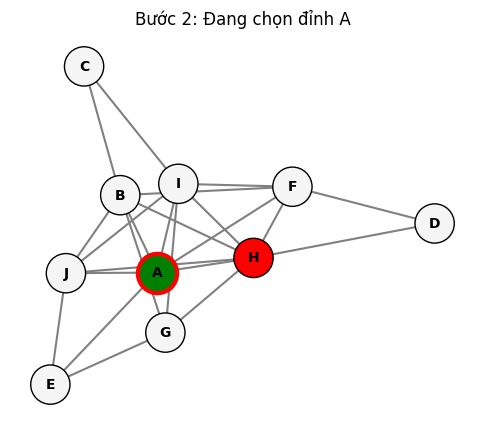

-> Đã chọn đỉnh B (Bậc 4), tô màu Blue


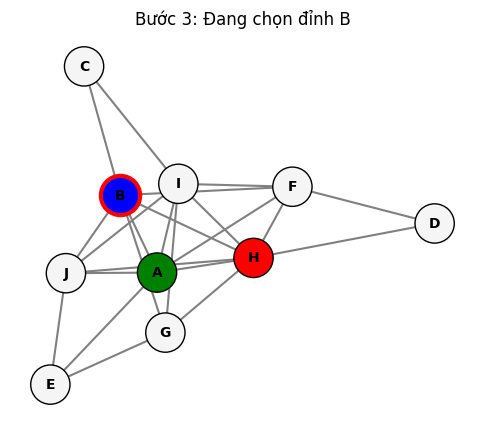

-> Đã chọn đỉnh I (Bậc 4), tô màu Blue


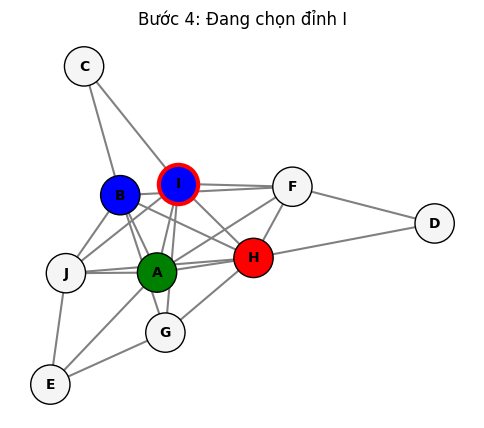

-> Đã chọn đỉnh E (Bậc 2), tô màu Red


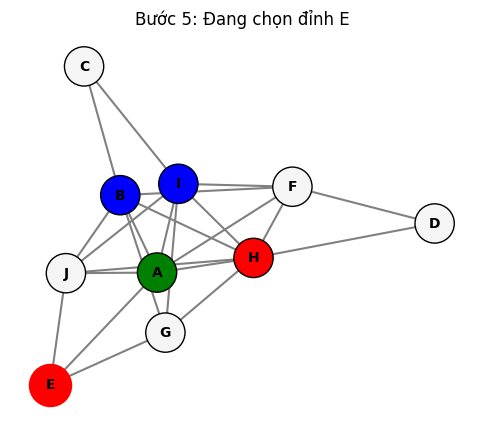

-> Đã chọn đỉnh D (Bậc 1), tô màu Green


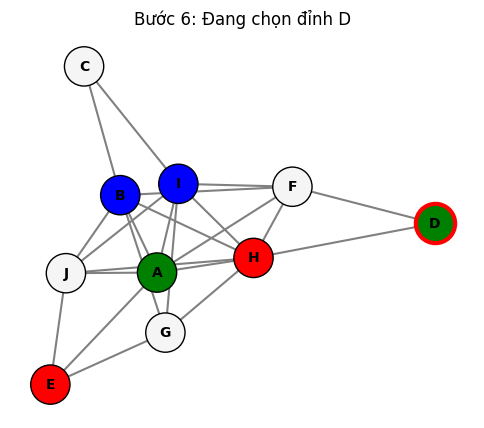

-> Đã chọn đỉnh C (Bậc 0), tô màu Red


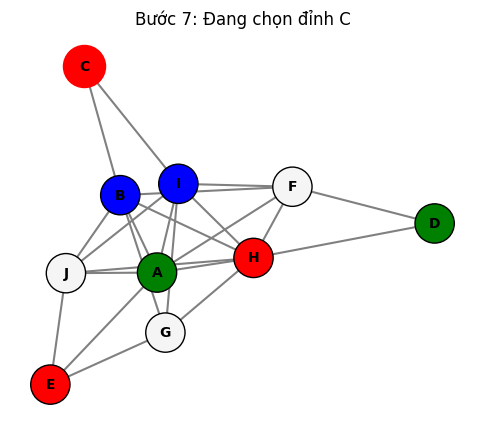

-> Đã chọn đỉnh F (Bậc 0), tô màu Yellow


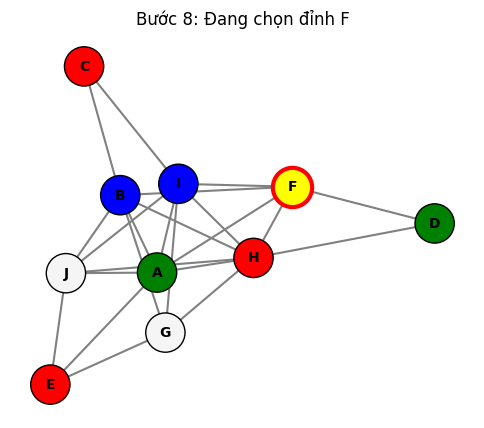

-> Đã chọn đỉnh G (Bậc 0), tô màu Green


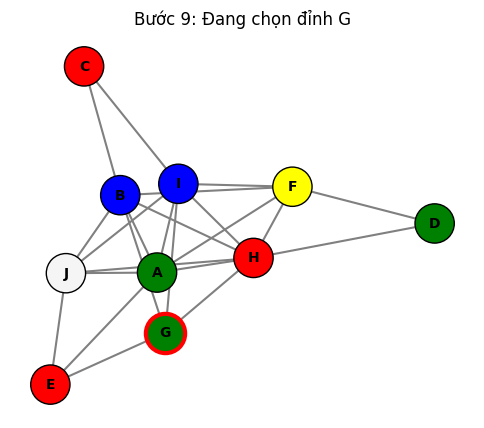

-> Đã chọn đỉnh J (Bậc 0), tô màu Yellow


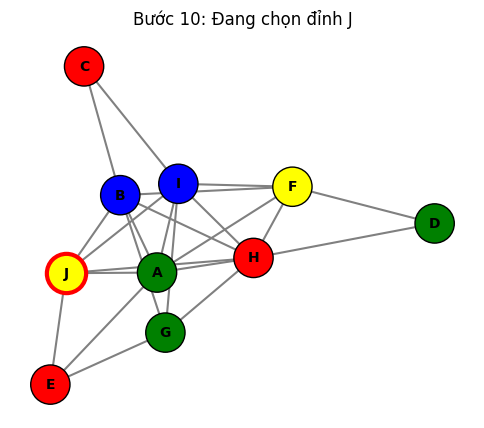


BANG QUA TRINH TO MAU (TRACE TABLE)


,Bước,Đỉnh chọn,Bậc khi chọn,Màu tô,Màu cấm,Bậc A,Bậc B,Bậc C,Bậc D,Bậc E,Bậc F,Bậc G,Bậc H,Bậc I,Bậc J
0,1,H,7,Red,Không,6,6,2,2,3,5,4,7,6,5
1,2,A,5,Green,Red,5,5,2,1,3,4,3,-,5,4
2,3,B,4,Blue,"Green, Red",-,4,2,1,2,3,3,-,4,3
3,4,I,4,Blue,"Green, Red",-,-,1,1,2,2,2,-,4,2
4,5,E,2,Red,Green,-,-,0,1,2,1,1,-,-,1
5,6,D,1,Green,Red,-,-,0,1,-,1,0,-,-,0
6,7,C,0,Red,Blue,-,-,0,-,-,0,0,-,-,0
7,8,F,0,Yellow,"Blue, Green, Red",-,-,-,-,-,0,0,-,-,0
8,9,G,0,Green,"Blue, Red",-,-,-,-,-,-,0,-,-,0
9,10,J,0,Yellow,"Blue, Green, Red",-,-,-,-,-,-,-,-,-,0



KET QUA CUOI CUNG
Tong so mau su dung: 4

Chi tiết tô màu:
   Đỉnh A: Green
   Đỉnh B: Blue
   Đỉnh C: Red
   Đỉnh D: Green
   Đỉnh E: Red
   Đỉnh F: Yellow
   Đỉnh G: Green
   Đỉnh H: Red
   Đỉnh I: Blue
   Đỉnh J: Yellow


In [11]:
print("=" * 50)
print("   CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ NGẪU NHIÊN")
print("=" * 50)

# --- BƯỚC 1: NHẬP SỐ LƯỢNG ĐỈNH ---
try:
    # Yêu cầu người dùng nhập số đỉnh
    # input(): Nhận input từ bàn phím (trả về string)
    n_input = input("Nhap so luong dinh (khuyen dung 5-10): ")

    # Chuyển đổi từ string sang integer
    n = int(n_input)

    # Kiểm tra tính hợp lệ
    if n <= 0:
        print("Vui long nhap so nguyen duong > 0")
    else:
        # --- BƯỚC 2: SINH MA TRẬN NGẪU NHIÊN ---
        filename = 'random_graph.txt'

        print("\n" + "-" * 40)
        print("1. Dang sinh ma tran ngau nhien...")
        generate_random_graph_file(n, filename)

        # --- BƯỚC 3: ĐỌC LẠI DỮ LIỆU TỪ FILE ---
        print("\n" + "-" * 40)
        print("2. Dang doc lai du lieu tu file...")
        adj_list = loadGraph(filename)

        # In ma trận đọc được
        print("\nMa tran ke duoc sinh:")
        for i, row in enumerate(adj_list):
            vertex_name = chr(65 + i) if n <= 26 else f"V{i}"
            print(f"   {vertex_name}: {row}")

        # --- BƯỚC 4: CHẠY THUẬT TOÁN ---
        print("\n" + "-" * 40)
        print("3. Bat dau thuat toan to mau...")
        print("-" * 40)

        # Khởi tạo đối tượng với lớp Advanced
        app = GraphColoringAdvanced(adj_list)

        # Gọi solve() - trả về tuple gồm (kết quả, DataFrame)
        results, df_report = app.solve()

        # --- BƯỚC 5: HIỂN THỊ BẢNG TRACE TABLE ---
        print("\n" + "=" * 50)
        print("BANG QUA TRINH TO MAU (TRACE TABLE)")
        print("=" * 50)

        # Cấu hình pandas để hiển thị đầy đủ các cột
        pd.set_option('display.max_columns', None)  # Hiện tất cả cột
        pd.set_option('display.width', 1000)        # Độ rộng tối đa

        # Sử dụng display() để hiển thị bảng đẹp hơn
        display(df_report)

        # --- BƯỚC 6: IN KẾT QUẢ CUỐI CÙNG ---
        print("\n" + "=" * 50)
        print("KET QUA CUOI CUNG")
        print("=" * 50)

        # Đếm số màu đã sử dụng
        # set(): Loại bỏ trùng lặp -> len(): Đếm số phần tử
        num_colors_used = len(set(results.values()))
        print(f"Tong so mau su dung: {num_colors_used}")
        print()

        # In chi tiết từng đỉnh
        print("Chi tiết tô màu:")
        for node in sorted(results.keys()):
            print(f"   Đỉnh {node}: {results[node]}")

except ValueError:
    # Xử lý trường hợp người dùng nhập không phải số
    print("Loi: Vui long nhap mot so nguyen hop le.")